##### Product Analysis for Online Retailing

     One of the problems we would like to solve through this project is customer segment. We would like to know more about customer profiles and similarities among the customers that help with better targeting current and potential customers in the future. Questions to be answered include: 1. Who are the major customers and where are they? 2. Any similarities among the customers with regard to geographical locations, favorable products, purchasing patterns and so on?  

     Another problem we would like to solve is predictive sales of this retailer. By diving into historical sales data, we would expect to answer the following questions: 1. What are the most popular and least popular products? 3. When do most sales take place? 4. Any trends in terms of sales in the one year and nine month period? 5. Does product pricing affect sales and by how much? 5. What do predictive sales look like?

## 1. Data Wrangling

# 1.1 Data Collection
        - Locating the Data
        - Data loading
        - Data joining

In [ ]:
#!conda install -c anaconda seaborn -y

In [ ]:
#!conda info

In [ ]:
#!pip install xlrd

In [1]:
#Load python packages
#import pandas as pd
#import numpy as np
#import datetime
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline


#import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone Two\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 1.2 Data Organization
        - File structure
        - Git & Github

# 1.3 Data Definition

In [3]:
# Review data types.
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Description of columns

| Column | Description |
| :- | :- |
| InvoiceNo | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cacellation. |
| StockCode | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. |
| Description | Product (item) name. Nominal. |
| Quantity | The quantities of each product (item) per transaction. Numeric. |
| InvoiceDate | Invoice Date and time. Numeric, the day and time when each transaction was generated. |
| UnitPrice | Unit price. Numeric. Product price per unit in sterling. |
| CustomerID | Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. |
| Country | Country name. Nominal, the name of the country where each customer resides. |


##### Print the range of values using the aggregate function. 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# 1.4 Data Cleaning

In [6]:
nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


###### So, there are two variables that have missing values. Let's look at them individually and think about methods to deal with it. 

##### Description: each product has a unique StockCode and description. Therefore it is possible to fill missing discription using StockCode. Bear in mind that in later analysis, only one of StockCode and Description will be used in analysis and modelling, because they are highly correlated. 

In [7]:
df['Description'] = df.groupby(["StockCode"])['Description'].transform(lambda x: x.fillna(x.mode()))

nas = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
CustomerID,0.249267
Description,0.002683


##### CustomerID: each transaction record involves an InvoiceNo, CustomerID and Country. Therefore we might be able to fill in missing CustomerID using InvoiceID and Country. 

In [8]:
df_Non_Null = df[df['CustomerID'].isnull()==False].copy()
print(df_Non_Null.shape)

df_Null = df[df['CustomerID'].isnull()==True].copy()
print(df_Null.shape)

df_join = df_Non_Null.merge(df_Null, on = 'InvoiceNo', how = 'inner')
df_join.head()

(406829, 8)
(135080, 8)


,InvoiceNo,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,CustomerID_y,Country_y


In [9]:
# since we were not able to find appropriate ways to fill the missing data, we will drop the missing values.
df = df.dropna(subset=['Description', 'CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
# set the data types: all columncs look good except that "CustomerID" should be string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

## 2. Exploratory Data Analysis

#### One of the problems we would like to solve through this project is customer segment. We would like to know more about customer profiles and similarities among the customers that help with better targeting current and potential customers in the future. Questions to be answered include: 1. Who are the major customers and where are they? 2. Any similarities among the customers with regard to geographical locations, favorable products, purchasing patterns and so on?  

#### Another problem we would like to solve is predictive sales of this retailer. By diving into historical sales data, we would expect to answer the following questions: 1. What are the most popular and least popular products? 3. When do most sales take place? 4. Any trends in terms of sales in the one year and nine month period? 5. Does product pricing affect sales and by how much? 5. What do predictive sales look like?


# 2.1 Data Profiles - Plots and Tables
    - Summary statistics
    - Outliers and Anamolies

##### 2.1.1 Check on Data Types: Look at the column names, InvoiceNo, StockCode, Quantity and CustomerID should be integers, Description and Country should be list of texts, InvoiceDate date time, and UnitPrice should be float. This step is to check on data types. If they are not the appropriate types, change the data types. 

In [11]:
# Let's split the cancelled orders out from the normal orders.
df_cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
df_cancelled.head()
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   datetime64[ns]
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   object        
 7   Country      8905 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 626.1+ KB


In [12]:
# double check if there is any anamolies
df_cancelled[df_cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
print("Number of cancelled transactions:", len(df_cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity']<=0]['Quantity'].count())
print(df[df['Quantity']<0].count())
print(df[df['Quantity']==0].count())

Number of cancelled transactions: 8905
Total number of transaction with negative quantity: 8905
InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
# df = df[df['InvoiceNo'].astype(str).str.contains('C')]
print(df[df['UnitPrice']<0].count())
print(df[df['UnitPrice']==0].count())
print(df_cancelled[df_cancelled['UnitPrice']<=0].count())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


##### So there are transactions with zero unit prices, which does not contribute useful information to our analysis. Therefore they should be deleted from the data frame.

In [15]:
# clean up df.
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [16]:
# df = df[(df['UnitPrice']>0) & df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  object        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [17]:
# Is there any duplicates?
print("Number of duplicated transactions:", len(df[df.duplicated()]))
df[df.duplicated()].sample(10)

# The results show that those are not really duplicate. They are different products shown on the
# results, meaning that one customer purchased various of products at one time. They should be 
# kept in the data for analysis. 

Number of duplicated transactions: 5192


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
188166,553014,23079,TOADSTOOL BEDSIDE LIGHT,1,2011-05-12 18:49:00,8.95,13451,United Kingdom
455449,575621,22470,HEART OF WICKER LARGE,2,2011-11-10 13:03:00,2.95,16892,United Kingdom
8035,537111,22637,PIGGY BANK RETROSPOT,1,2010-12-05 12:08:00,2.55,14810,United Kingdom
523251,580504,22551,PLASTERS IN TIN SPACEBOY,1,2011-12-04 13:32:00,1.65,17936,United Kingdom
321613,565152,22208,WOOD STAMP SET THANK YOU,1,2011-09-01 14:42:00,0.83,17799,United Kingdom
284284,561868,21174,POTTERING IN THE SHED METAL SIGN,1,2011-07-31 11:26:00,2.08,16813,United Kingdom
489125,577938,23378,PACK OF 12 50'S CHRISTMAS TISSUES,2,2011-11-22 12:07:00,0.39,15525,United Kingdom
288894,562213,23240,SET OF 4 KNICK KNACK TINS DOILEY,1,2011-08-03 13:39:00,4.15,13975,United Kingdom
462827,576014,22619,SET OF 6 SOLDIER SKITTLES,1,2011-11-13 14:29:00,3.75,17218,United Kingdom
172766,551558,22383,LUNCH BAG SUKI DESIGN,1,2011-05-03 10:41:00,1.65,17841,United Kingdom


In [18]:
# for the purpose of time series analysis, let's split the InvoiceDate into details.
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['weekday'] = df['InvoiceDate'].dt.day_name()
df['month_year'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
df['hour'] = df['InvoiceDate'].dt.hour
df.head()

# How about run this code before spliting the cancelled order out?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,weekday,month_year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2010,Wednesday,2010-12-01,8


In [19]:
# adding a column of "revenue"
df['revenue'] = df['UnitPrice']*df['Quantity']

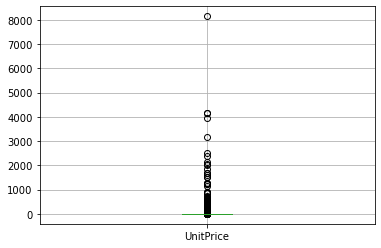

In [20]:
boxplot_UnitPrice = df.boxplot(column=['UnitPrice'])

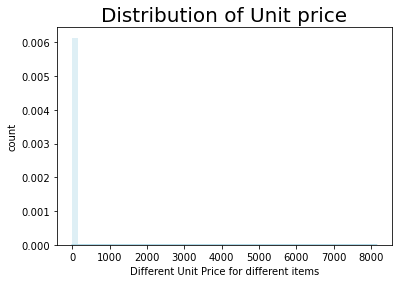

In [21]:
# visualizing the unitprice

sns.distplot(df['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

In [22]:
# From the descriptive statistics for price variable, we could see that most of the products are 
# cheap. We would like to check out description of products, which cost more than 50. 

df[df['UnitPrice']>50]['Description'].unique().tolist()

# ? further checking on this one, probably need to take out the "CARRIAGE", "Manual", "POSTAGE" 
# and "DOTCOME POSTAGE". 

['RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
 'VINTAGE POST OFFICE CABINET',
 'VINTAGE RED KITCHEN CABINET',
 'REGENCY MIRROR WITH SHUTTERS',
 'LOVE SEAT ANTIQUE WHITE METAL',
 'VINTAGE BLUE KITCHEN CABINET',
 'SCHOOL DESK AND CHAIR ',
 'CHEST NATURAL WOOD 20 DRAWERS',
 'CARRIAGE',
 'DECORATIVE HANGING SHELVING UNIT',
 'Manual',
 'POSTAGE',
 'PICNIC BASKET WICKER 60 PIECES',
 'DOTCOM POSTAGE']

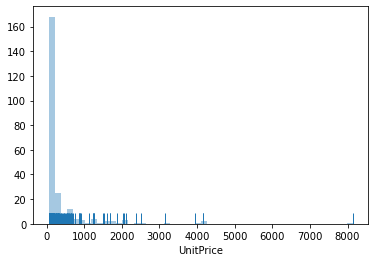

In [23]:
# price distribution of expensive goods:
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=False, rug=True)

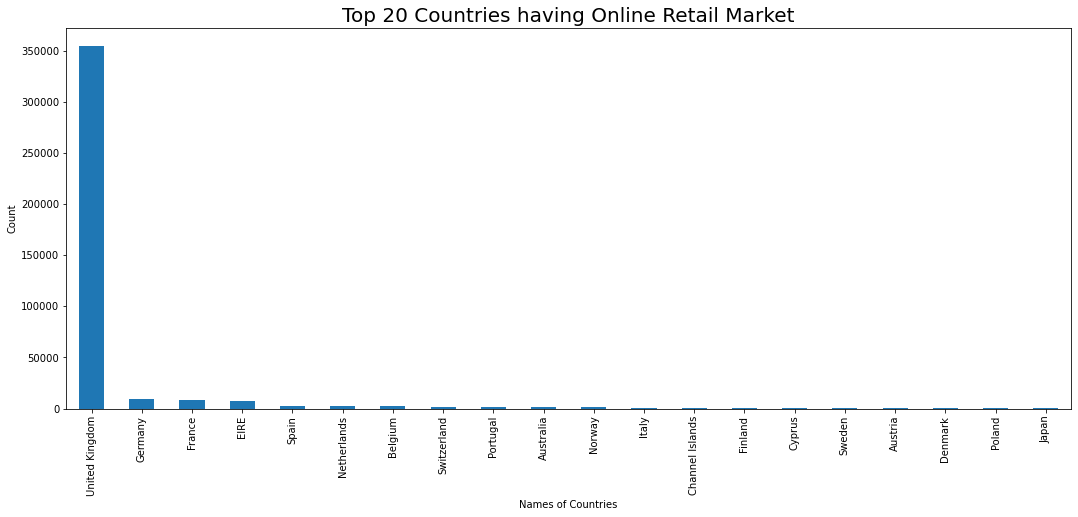

In [24]:
# checking the different values for country in the dataset

df['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

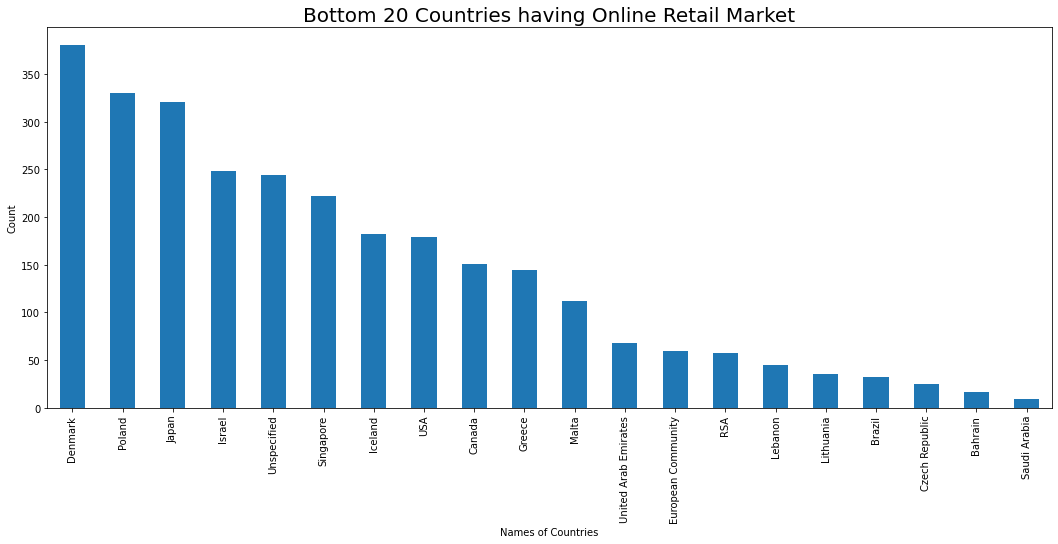

In [25]:
# checking the different values for country in the dataset

df['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

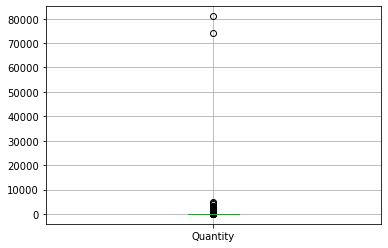

In [26]:
boxplot_Quantity = df.boxplot(column=['Quantity'])

In [27]:
# checking how many quantity of products have been sold online from each country
df['Quantity'].groupby(df['Country']).agg('sum')

Country
Australia                 83901
Austria                    4881
Bahrain                     260
Belgium                   23237
Brazil                      356
Canada                     2763
Channel Islands            9491
Cyprus                     6361
Czech Republic              671
Denmark                    8235
EIRE                     140275
European Community          499
Finland                   10704
France                   111471
Germany                  119261
Greece                     1557
Iceland                    2458
Israel                     4046
Italy                      8112
Japan                     26016
Lebanon                     386
Lithuania                   652
Malta                       970
Netherlands              200361
Norway                    19336
Poland                     3684
Portugal                  16122
RSA                         351
Saudi Arabia                 80
Singapore                  5241
Spain                     27940


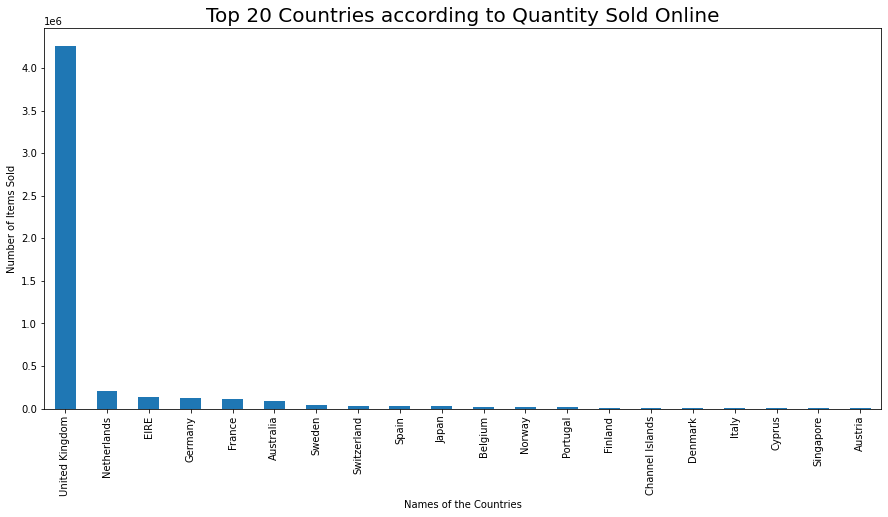

In [28]:
# Having a look at the top 20 Countries in terms of Quantities according to the countries

df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

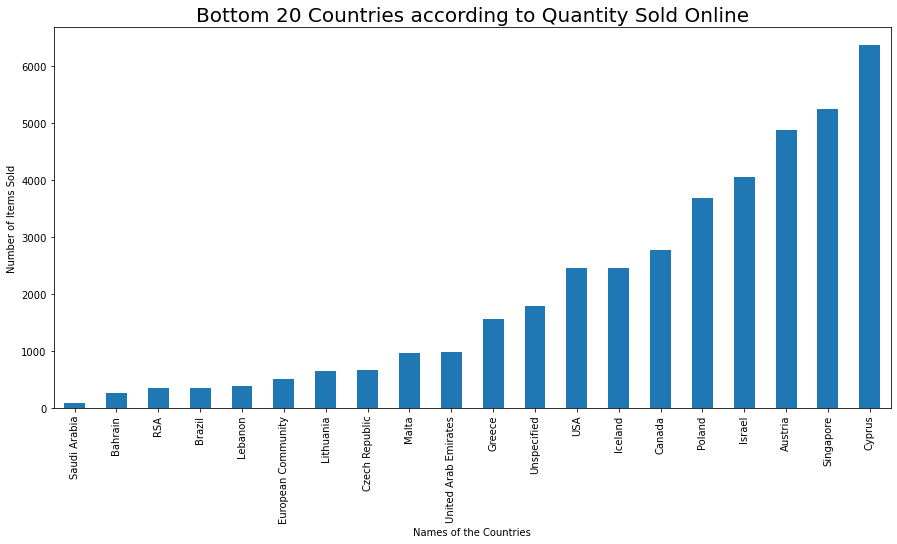

In [29]:

# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

In [30]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

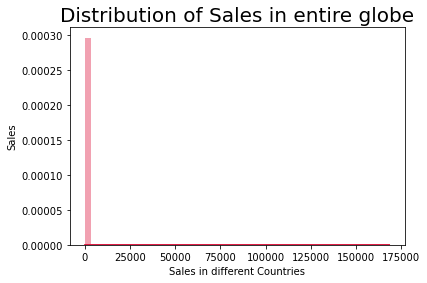

In [31]:
# visualizing the sales in the entire globe
sns.distplot(df['revenue'], color = 'crimson')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

In [32]:
# looking at each country's sales

df['revenue'].groupby(df['Country']).agg('sum').sort_values(ascending = False)

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

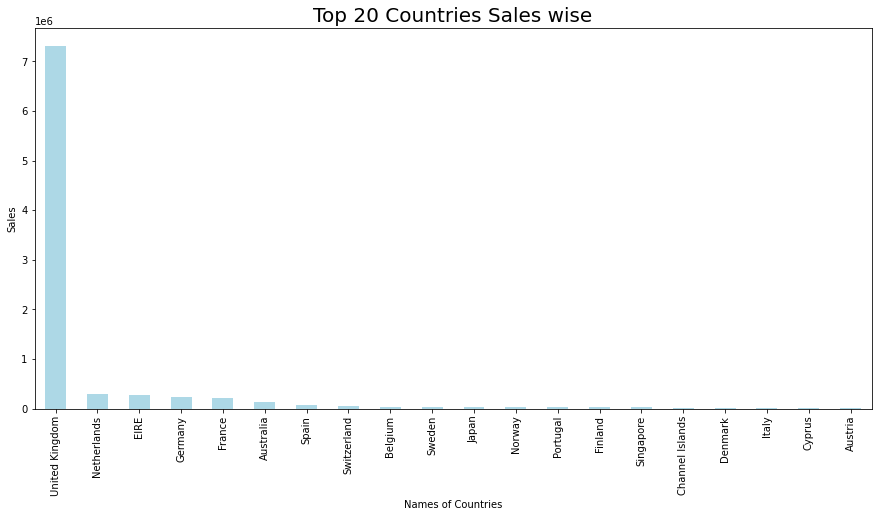

In [33]:
# looking at the top 20 countries sales wise

df['revenue'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7), color = 'lightblue')
plt.title('Top 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

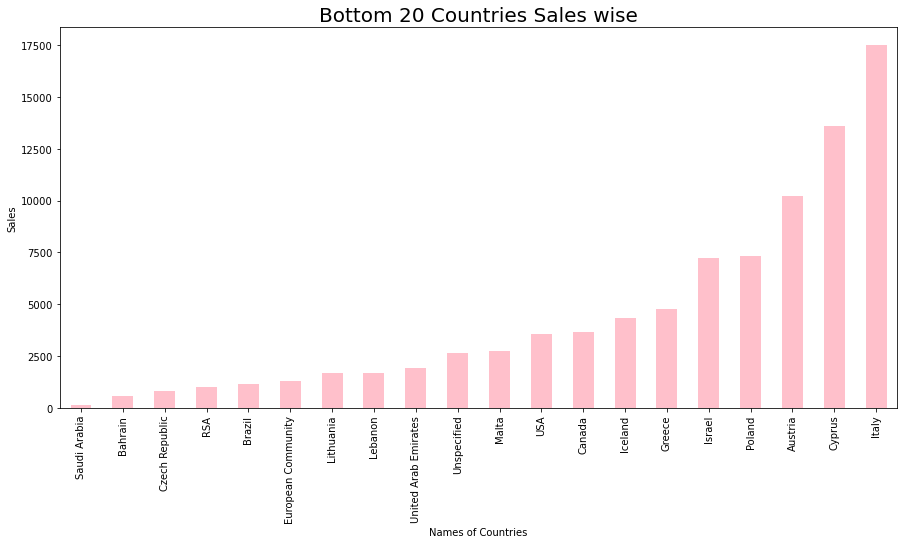

In [34]:
# looking at the bottom 20 countries sales wise

df['revenue'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

In [35]:
# Data frames for plots
plot = pd.DataFrame(df.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df.groupby(['weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(df.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df.groupby(['month_year'])['revenue'].sum()).reset_index()

In [36]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

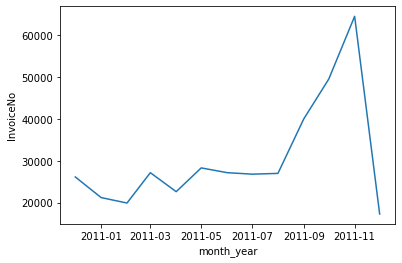

In [37]:
# How many orders per month?
# There are more purchasing made by the end of the year. The highest number of transactions were
# made in November. Probably reson could be the fact that people tend to prepare for Christmas
# in November. Other than November all months have similar purchasing patterns.
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

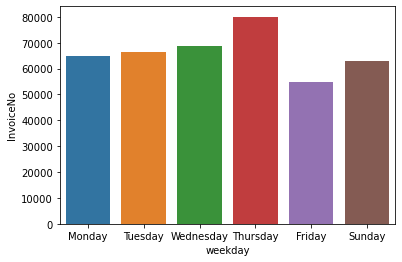

In [38]:
# How many orders per day?

ax = sns.barplot(x="weekday", y="InvoiceNo", data = plot2)

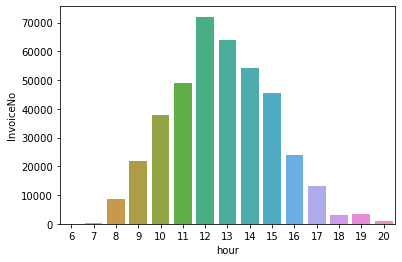

In [39]:
# How many orders per hour?
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

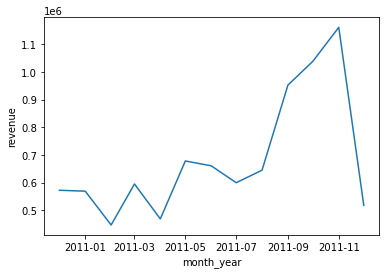

In [40]:
# Which month brings the highest revenue?
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)

# We would like to do the same thing for the cancelled ordders.

In [41]:
# for the purpose of time series analysis, let's split the InvoiceDate into details.
df_cancelled['month'] = df_cancelled['InvoiceDate'].dt.month
df_cancelled['year'] = df_cancelled['InvoiceDate'].dt.year
df_cancelled['weekday'] = df_cancelled['InvoiceDate'].dt.day_name()
df_cancelled['month_year'] = pd.to_datetime(df_cancelled[['year', 'month']].assign(Day=1))
df_cancelled['hour'] = df_cancelled['InvoiceDate'].dt.hour
df_cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,weekday,month_year,hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,12,2010,Wednesday,2010-12-01,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,12,2010,Wednesday,2010-12-01,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,12,2010,Wednesday,2010-12-01,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,12,2010,Wednesday,2010-12-01,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,12,2010,Wednesday,2010-12-01,10


In [42]:
# adding a column of "revenue"
df_cancelled['revenue'] = df_cancelled['UnitPrice']*df_cancelled['Quantity']

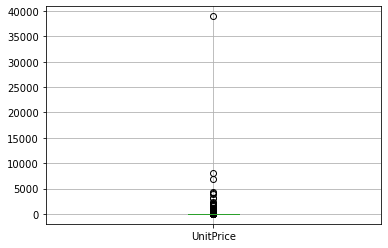

In [43]:
boxplot_UnitPrice = df_cancelled.boxplot(column=['UnitPrice'])

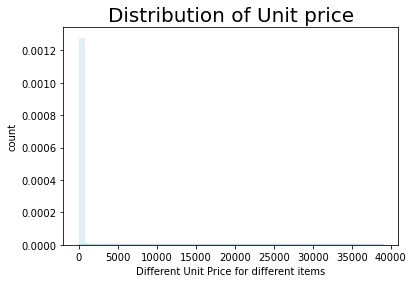

In [44]:
# visualizing the unitprice

sns.distplot(df_cancelled['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

In [45]:
# From the descriptive statistics for price variable, we could see that most of the products are 
# cheap. We would like to check out description of products, which cost more than 50. 

df_cancelled[df_cancelled['UnitPrice']>50]['Description'].unique().tolist()

# ? further checking on this one, probably need to take out the "CARRIAGE", "Manual", "POSTAGE" 
# and "DOTCOME POSTAGE". 

['Discount',
 'VINTAGE BLUE KITCHEN CABINET',
 'VINTAGE RED KITCHEN CABINET',
 'Manual',
 'SCHOOL DESK AND CHAIR ',
 'RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
 'DECORATIVE HANGING SHELVING UNIT',
 'POSTAGE',
 'LOVE SEAT ANTIQUE WHITE METAL',
 'BROCADE RING PURSE ',
 'CRUK Commission']

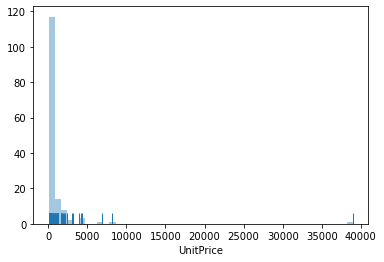

In [46]:
# price distribution of expensive goods:
sns.distplot(df_cancelled[df_cancelled['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

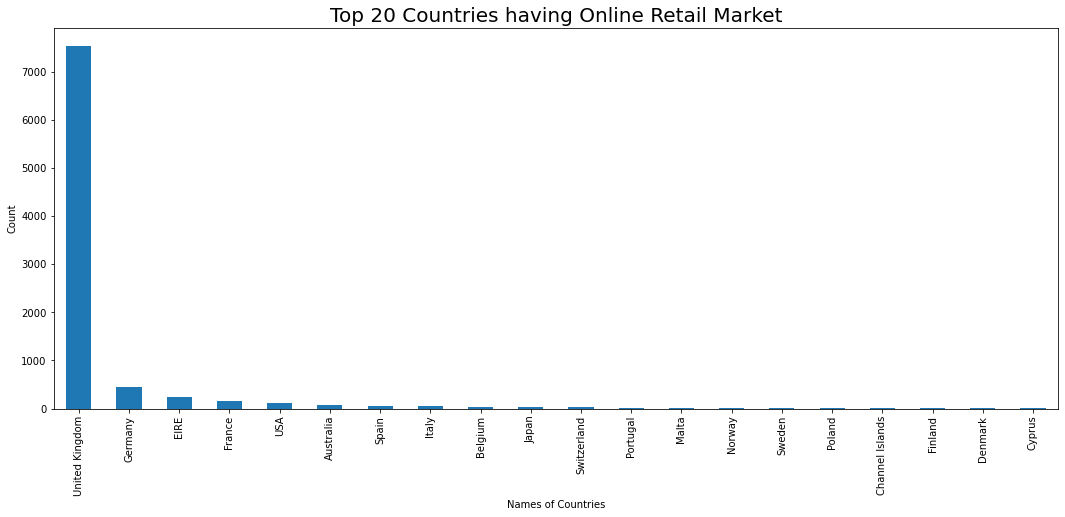

In [47]:
# checking the different values for country in the dataset

df_cancelled['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

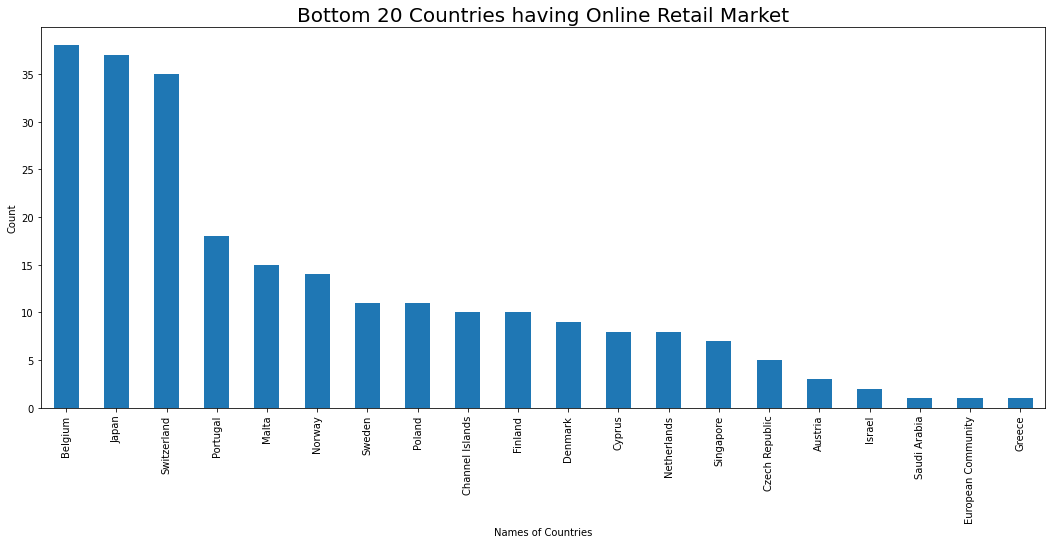

In [48]:
# checking the different values for country in the dataset

df_cancelled['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

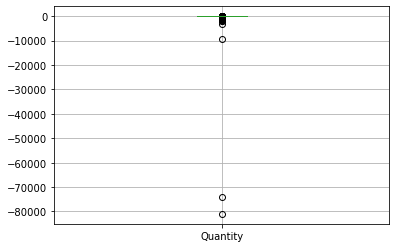

In [49]:
boxplot_Quantity = df_cancelled.boxplot(column=['Quantity'])

In [50]:
# checking how many quantity of products have been sold online from each country
df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum')

Country
Australia               -556
Austria                  -54
Belgium                  -85
Channel Islands          -12
Cyprus                   -44
Czech Republic           -79
Denmark                  -47
EIRE                   -4196
European Community        -2
Finland                  -38
France                 -1624
Germany                -1815
Greece                    -1
Israel                   -56
Italy                   -113
Japan                   -798
Malta                    -26
Netherlands             -809
Norway                   -91
Poland                   -31
Portugal                 -78
Saudi Arabia              -5
Singapore                 -7
Spain                  -1127
Sweden                  -446
Switzerland             -305
USA                    -1424
United Kingdom       -260939
Name: Quantity, dtype: int64

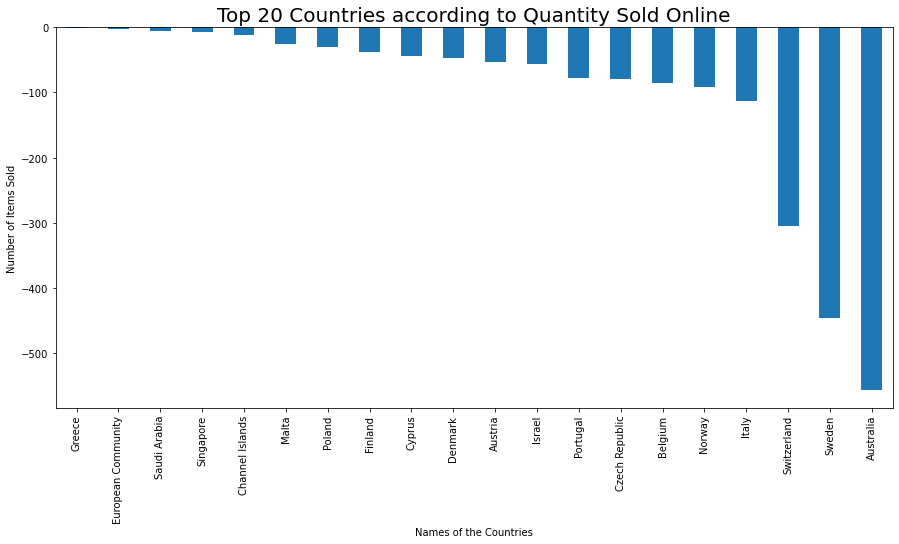

In [51]:
# Having a look at the top 20 Countries in terms of Quantities according to the countries

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

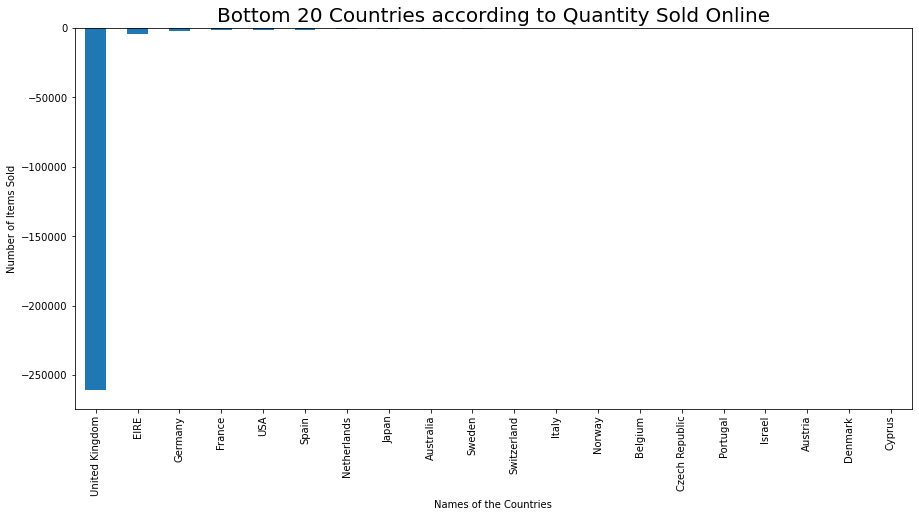

In [52]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

df_cancelled['Quantity'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df_cancelled['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

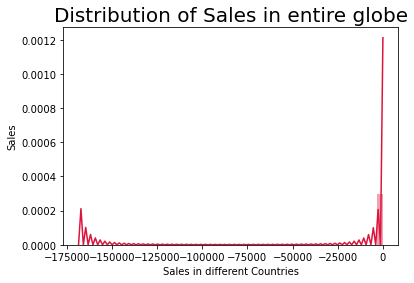

In [53]:
# visualizing the sales in the entire globe
sns.distplot(df_cancelled['revenue'], color = 'crimson')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

In [54]:
# looking at each country's sales

df_cancelled['revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False)

Country
European Community        -8.50
Saudi Arabia             -14.75
Austria                  -44.36
Greece                   -50.00
Czech Republic          -119.02
Poland                  -121.51
Denmark                 -187.20
Finland                 -219.34
Malta                   -220.12
Israel                  -227.44
Belgium                 -285.38
Channel Islands         -364.15
Italy                   -592.73
Cyprus                  -644.09
Switzerland             -704.55
Netherlands             -784.80
Norway                 -1001.98
Australia              -1444.04
Sweden                 -1782.42
USA                    -1849.47
Japan                  -2075.75
Portugal               -4380.08
Spain                  -6802.53
Germany                -7168.93
Singapore             -12158.90
France                -12311.21
EIRE                  -15260.68
United Kingdom       -540518.16
Name: revenue, dtype: float64

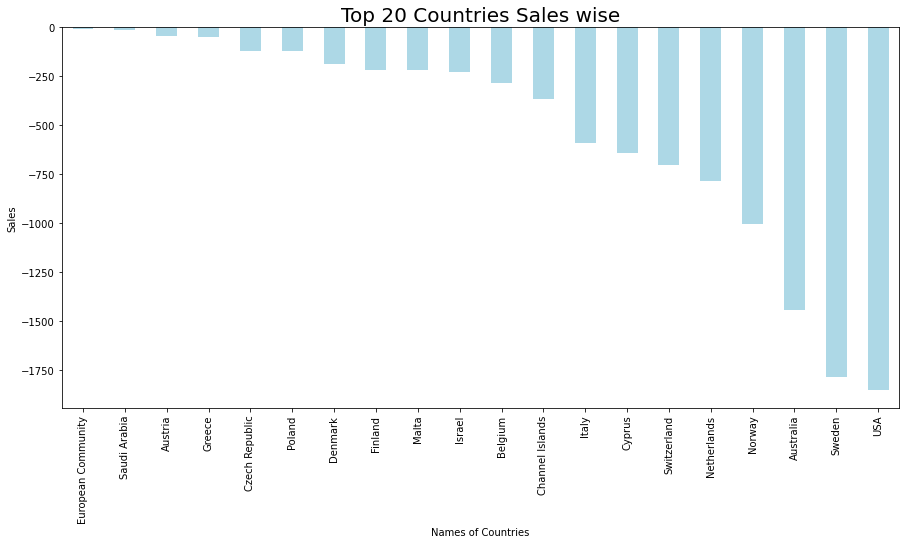

In [55]:
# looking at the top 20 countries sales wise

df_cancelled['revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7), color = 'lightblue')
plt.title('Top 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

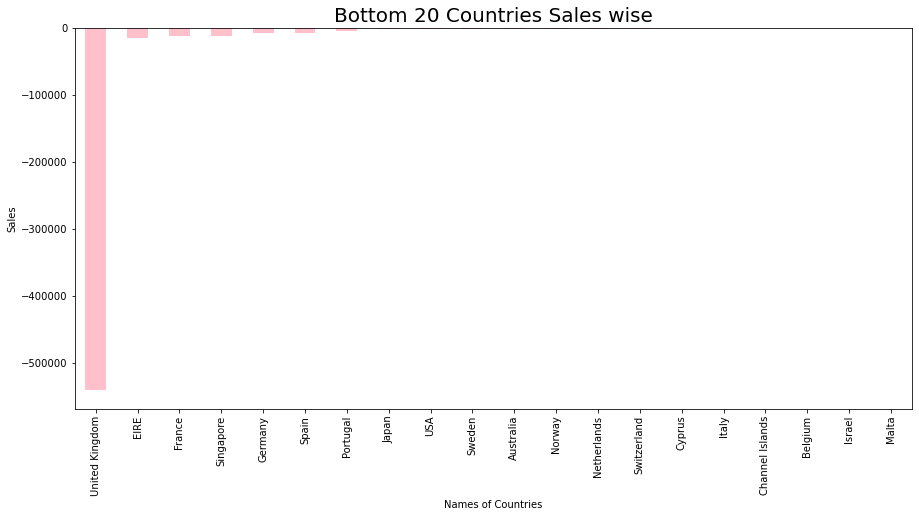

In [56]:
# looking at the bottom 20 countries sales wise

df_cancelled['revenue'].groupby(df_cancelled['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

In [57]:
# Data frames for plots
plot = pd.DataFrame(df_cancelled.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df_cancelled.groupby(['weekday'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df_cancelled.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(df_cancelled.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df_cancelled.groupby(['month_year'])['revenue'].sum()).reset_index()

In [58]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

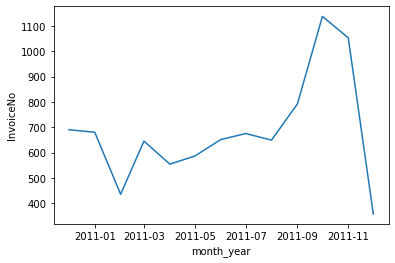

In [59]:
# How many orders per month?
# There are more purchasing made by the end of the year. The highest number of transactions were
# made in November. Probably reson could be the fact that people tend to prepare for Christmas
# in November. Other than November all months have similar purchasing patterns.
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

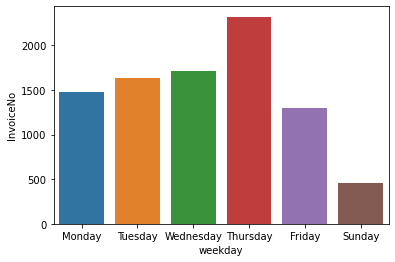

In [60]:
# How many orders per day?

ax = sns.barplot(x="weekday", y="InvoiceNo", data = plot2)

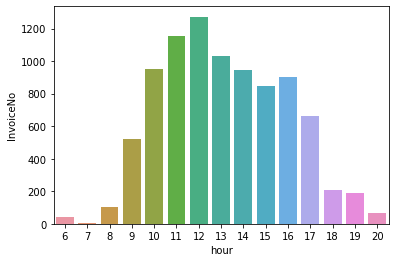

In [61]:
# How many orders per hour?
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

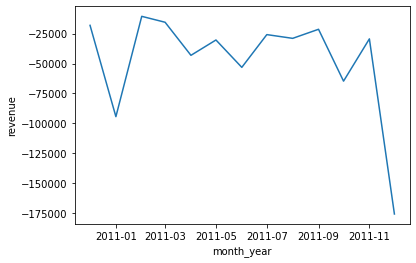

In [62]:
# Which month brings the highest revenue?
ax = sns.lineplot(x = 'month_year', y='revenue', data = plot5)

# 2.2 Data Relationships
    - Pair plots

# 2.3 Indentifying and Creating Features
    - Principal Components Analysis
    - Clustering
